In [1]:
pip install /Users/vadimbaev/startml/lazada/sdk

Processing ./lazada/sdk
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for lazop-sdk-python: filename=lazop_sdk_python-1.1.0-py3-none-any.whl size=3351 sha256=b727a22b03509d8525a838a46adeeec8b30c8a0ea57167c2bccb13453026099e
  Stored in directory: /private/var/folders/bz/04tfbmdj1hzbp4rv5pbqc2dw0000gn/T/pip-ephem-wheel-cache-c3w960nn/wheels/54/5f/a4/1678784afd549d03fc9a200e4dc380a6c3bbdefeb40a783836
Successfully built lazop-sdk-python
Note: you may need to restart the kernel to use updated packages.


In [170]:
from lazop import LazopClient, LazopRequest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://api.lazada.co.th/rest'
appkey = 115482
appSecret = 'gu1daX66QLlPzqSfXJUFCOV93ynxx8ZM'


client = LazopClient(url,appkey,appSecret)

In [94]:
access_token = '50000701c17cnbfXdAS5PxxifmMlw15894b6elzy9kzAxsgvo3uMPYZfS4lRmQOK'

In [97]:
client = LazopClient(url, appkey ,appSecret)
request = LazopRequest('/finance/transaction/detail/get','GET')
request.add_api_param('trans_type', '-1')
request.add_api_param('start_time', '2022-12-01')
request.add_api_param('end_time', '2023-01-01')
request.add_api_param('limit', '100')
request.add_api_param('offset', '0')
response = client.execute(request, access_token)
print(response.type)
print(response.body)

None
{'data': [{'order_no': '639715776464242', 'transaction_date': '10 Jan 2023', 'amount': '-10.00', 'paid_status': 'Not paid', 'shipping_provider': 'Delivered by Seller', 'WHT_included_in_amount': 'No', 'lazada_sku': '4329112817_TH-17248196461', 'transaction_type': 'Orders-Lazada Fees', 'orderItem_no': '639715776564242', 'orderItem_status': 'Delivered', 'reference': '639715776564242', 'fee_name': 'SOD - COD charge', 'shipping_speed': 'standard', 'WHT_amount': '0.00', 'transaction_number': '639715776564242', 'seller_sku': '123244', 'statement': '09 Jan 2023 - 15 Jan 2023', 'details': 'CHess USA', 'VAT_in_amount': '0.00', 'shipment_type': 'Dropshipping'}, {'order_no': '639715776464242', 'transaction_date': '10 Jan 2023', 'amount': '-0.21', 'paid_status': 'Not paid', 'shipping_provider': 'Delivered by Seller', 'WHT_included_in_amount': 'No', 'lazada_sku': '4329112817_TH-17248196461', 'transaction_type': 'Orders-Lazada Fees', 'orderItem_no': '639715776564242', 'orderItem_status': 'Delive

In [231]:
# Создаем пустой датафрейм для объединения 
data = pd.DataFrame()

# Устанавливаем лимит загружаемых строк
limit = 100

# Устанавливаем количество строк, которые будут пропущены в начале
offset = 0

# Устанавливаем счетчик
count = 0

# Загружаем 1000 страниц
while count < 1000:
    
    # Добавляем параметры для запроса
    client = LazopClient(url, appkey ,appSecret)
    request = LazopRequest('/finance/transaction/detail/get','GET')
    request.add_api_param('start_time', '2022-12-20')
    request.add_api_param('end_time', '2023-01-01')
    request.add_api_param('limit', '100')
    request.add_api_param('offset', '0')    

    # Отправляем GET запрос и получаем ответ
    response = client.execute(request, access_token)

    # Обрабатываем полученные данные
    df = pd.json_normalize(response.body, record_path='data')
    
    # Объединяем данные в одну таблицу
    data = pd.concat([data, df])
    
    # Проверяем, есть ли еще данные
    if len(df) < limit:
        # Если количество полученных данных меньше, чем запрошенное количество,
        # значит больше данных нет
        break

    # Увеличиваем смещение для следующей страницы
    offset += limit
    
    # Увеличиваем счетчик
    count += 1
    
    

In [232]:
# Посмотрим на полученные данные

data

,order_no,transaction_date,amount,paid_status,shipping_provider,WHT_included_in_amount,lazada_sku,transaction_type,orderItem_no,orderItem_status,reference,fee_name,shipping_speed,WHT_amount,transaction_number,seller_sku,statement,details,VAT_in_amount,shipment_type
0,638063941264242,01 Jan 2023,-10.00,Not paid,Delivered by Seller,No,4329112817_TH-17248196461,Orders-Lazada Fees,638063941464242,Delivered,638063941464242,SOD - COD charge,standard,0.00,638063941464242,123244,26 Dec 2022 - 01 Jan 2023,CHess USA,0.00,Dropshipping
1,638063941264242,01 Jan 2023,-0.21,Not paid,Delivered by Seller,No,4329112817_TH-17248196461,Orders-Lazada Fees,638063941464242,Delivered,638063941464242,Commission,standard,0.00,638063941464242,123244,26 Dec 2022 - 01 Jan 2023,CHess USA,0.01,Dropshipping
2,638063941264242,01 Jan 2023,0.32,Not paid,Delivered by Seller,No,4329112817_TH-17248196461,Orders-Lazada Fees,638063941464242,Delivered,638063941464242,Payment fee refund - correction for SOD-COD,standard,0.00,638063941464242,123244,26 Dec 2022 - 01 Jan 2023,CHess USA,0.02,Dropshipping
3,638063941264242,01 Jan 2023,-0.32,Not paid,Delivered by Seller,No,4329112817_TH-17248196461,Orders-Lazada Fees,638063941464242,Delivered,638063941464242,Payment Fee,standard,0.00,638063941464242,123244,26 Dec 2022 - 01 Jan 2023,CHess USA,0.02,Dropshipping
4,638063941264242,01 Jan 2023,10.00,Not paid,Delivered by Seller,No,4329112817_TH-17248196461,Orders-Sales,638063941464242,Delivered,638063941464242,Item Price Credit,standard,0.00,638063941464242,123244,26 Dec 2022 - 01 Jan 2023,CHess USA,0.00,Dropshipping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,633387557464242,22 Dec 2022,4000.00,Not paid,Delivered by Seller,No,4325311556_TH-17234301212,Orders-Sales,633387557564242,Delivered,633387557564242,Item Price Credit,standard,0.00,633387557564242,TEST000003,19 Dec 2022 - 25 Dec 2022,ELC Product 03,0.00,Dropshipping
96,633387557464242,22 Dec 2022,-800.00,Not paid,Delivered by Seller,No,4325311556_TH-17234301212,Orders-Marketing Fees,633387557564242,Delivered,633387557564242,Promotional Charges Flexi-Combo,standard,0.00,633387557564242,TEST000003,19 Dec 2022 - 25 Dec 2022,ELC Product 03,0.00,Dropshipping
97,633378581964242,22 Dec 2022,-4000.00,Not paid,Delivered by Seller,No,4325311556_TH-17234301212,Orders-Lazada Fees,633378582164242,Delivered,633378582164242,SOD - COD charge,standard,0.00,633378582164242,TEST000003,19 Dec 2022 - 25 Dec 2022,ELC Product 03,0.00,Dropshipping
98,633378581964242,22 Dec 2022,-85.60,Not paid,Delivered by Seller,No,4325311556_TH-17234301212,Orders-Lazada Fees,633378582164242,Delivered,633378582164242,Commission,standard,0.00,633378582164242,TEST000003,19 Dec 2022 - 25 Dec 2022,ELC Product 03,5.60,Dropshipping


In [233]:
# Посмотрим на тип данных наличие и пропусков в колонках 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_no                100100 non-null  object
 1   transaction_date        100100 non-null  object
 2   amount                  100100 non-null  object
 3   paid_status             100100 non-null  object
 4   shipping_provider       100100 non-null  object
 5   WHT_included_in_amount  100100 non-null  object
 6   lazada_sku              100100 non-null  object
 7   transaction_type        100100 non-null  object
 8   orderItem_no            100100 non-null  object
 9   orderItem_status        100100 non-null  object
 10  reference               100100 non-null  object
 11  fee_name                100100 non-null  object
 12  shipping_speed          100100 non-null  object
 13  WHT_amount              100100 non-null  object
 14  transaction_number      100100 non-null 

In [234]:
# Поменяем тип данных у нужных нам колонок

data.amount = data.amount.astype('float')
data.WHT_amount = data.WHT_amount.astype('float')
data.VAT_in_amount = data.VAT_in_amount.astype('float')
data.transaction_date = data.transaction_date.astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_no                100100 non-null  object        
 1   transaction_date        100100 non-null  datetime64[ns]
 2   amount                  100100 non-null  float64       
 3   paid_status             100100 non-null  object        
 4   shipping_provider       100100 non-null  object        
 5   WHT_included_in_amount  100100 non-null  object        
 6   lazada_sku              100100 non-null  object        
 7   transaction_type        100100 non-null  object        
 8   orderItem_no            100100 non-null  object        
 9   orderItem_status        100100 non-null  object        
 10  reference               100100 non-null  object        
 11  fee_name                100100 non-null  object        
 12  shipping_speed          100100 non

In [235]:
# Посмотрим на статистики числовых данных

data.describe()

,amount,WHT_amount,VAT_in_amount
count,100100.000000,100100.0,100100.000000
mean,-83.093500,0.0,0.666100
std,1018.132641,0.0,1.725422
min,-4000.000000,0.0,0.000000
25%,-10.000000,0.0,0.000000
50%,-0.320000,0.0,0.010000
75%,5.295000,0.0,0.020000
max,4000.000000,0.0,6.720000


#### Из числовых статистик видим, что withholding tax, т.е. сумма удерживаемого налога равна 0 во всем датасете. А сумма (amount) имеет достаточно сильный разброс. 

In [236]:
# Посмотрим на статистики нечисловых данных

data.describe(exclude = [np.number])

/var/folders/bz/04tfbmdj1hzbp4rv5pbqc2dw0000gn/T/ipykernel_23191/1756291981.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude = [np.number])


,order_no,transaction_date,paid_status,shipping_provider,WHT_included_in_amount,lazada_sku,transaction_type,orderItem_no,orderItem_status,reference,fee_name,shipping_speed,transaction_number,seller_sku,statement,details,shipment_type
count,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100,100100
unique,14,6,1,1,1,6,3,21,1,21,6,1,21,6,2,7,1
top,633387557464242,2023-01-01 00:00:00,Not paid,Delivered by Seller,No,4329112817_TH-17248196461,Orders-Lazada Fees,633387557564242,Delivered,633387557564242,SOD - COD charge,standard,633387557564242,123244,26 Dec 2022 - 01 Jan 2023,CHess USA,Dropshipping
freq,12012,40040,100100,100100,100100,63063,77077,6006,100100,6006,20020,100100,6006,63063,69069,60060,100100
first,NaN,2022-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Всего в датасете 14 уникальных заказов за 6 дней. Что выглядит очень странным, т.к. Лазада - один из крупнейших маркетплейсов. Но если мы посмотрим на количество уникальных SKU, которое равно 6, то можно сделать вывод, что эти заказы относятся только к данным товарам.

#### SKU - stock keeping unit или единица учета запасов, которую розничные продавцы присваивают товарам для отслеживания уровня запасов внутри компании. В датасете мы видим SKU как Лазады (lazada_sku), так и продавца (seller_sku). Скорее всего они для учета товаров как на складе самого продавца, так и на складе маркетплейса.



Колонки с единственным значением:
paid_status - Not paid,
shipping_provider - Delivered by Seller,
WHT_included_in_amount - No,
orderItem_status - Delivered,
shipping_speed - standard,
shipment_type - Dropshipping

In [237]:
# Посмотрим на типы транзакций

data.transaction_type.value_counts()

Orders-Lazada Fees       77077
Orders-Sales             19019
Orders-Marketing Fees     4004
Name: transaction_type, dtype: int64

#### Здесь мы видим описание типов комиссий, их всего 3. Значит на каждый товар должно быть по 3 разных транзакции. Но это не стыкуется с данными из описания нечисловых статистик:  в колонке transaction_number всего 21 уникальная транзакция, а должно быть 18 (по числу уникальных товаров). 

In [238]:
# Посмотрим на колонку details

data.details.value_counts()

CHess USA                                               60060
ELC Product 03                                          15015
HANA-N 1112974  แอร์ผนัง HEA DXK13YW-W1 11098BTU INV     6006
ELCVirtualSet                                            6006
HANA-N 1164573  ค.ทำน้ำร้อน STIEBEL DDC6EC BK 6000W      5005
FW SKX MU 65032 BBK                                      5005
Cheetos USA พร้อมส่ง!!  Cheddar Jalapeno                 3003
Name: details, dtype: int64

In [239]:
# Посмотрим на колонку seller_sku

data.seller_sku.value_counts()

123244              63063
TEST000003          15015
20-2400001220533     6006
ELTH0402             6006
20-2400001737581     5005
50B7100UW            5005
Name: seller_sku, dtype: int64

In [240]:
# Просуммируем CHess USA и Cheetos USA из предположения, что они проходят под одним sku

data.details.value_counts()[0] + data.details.value_counts()[-1]

63063

#### Итак, мы нашли причину несоответствия количества уникальных товаров с количеством уникальных транзакций. Она была в том, что товары под одним sku имеют разные описания в details и, соответственно, проходили как разные товары.

In [241]:
# Посмотрим на виды комиссий

data.fee_name.value_counts()

SOD - COD charge                               20020
Commission                                     20020
Payment Fee                                    19019
Item Price Credit                              19019
Payment fee refund - correction for SOD-COD    18018
Promotional Charges Flexi-Combo                 4004
Name: fee_name, dtype: int64

Здесь у нас:

SOD - COD charge - оплата наличными при получении, 
Commission - комиссия, 
Payment Fee - Платежная комиссия, 
Item Price Credit - оплата кредитной картой (вероятно),
Payment fee refund - correction for SOD-COD - возврат комиссии и корректировка оплаты при получении,
Promotional Charges Flexi-Combo  - Рекламные сборы Flexi-Combo

#### Из одинакового количества транзакций можно сделать вывод, что при оплате наличными взимается Commission, а при оплате кредитной картой (вероятно) - Payment Fee

In [243]:
# Посчитаем средние комиссии за оплату наличными и кредитной картой

mean_cod_fee = data[data['fee_name'] == 'Commission']['amount'].mean() / data[data['fee_name'] == 'SOD - COD charge']['amount'].mean()

mean_credit_fee = data[data['fee_name'] == 'Payment Fee']['amount'].mean() / data[data['fee_name'] == 'Item Price Credit']['amount'].mean()

print(f'Средний размер комиссии за оплату наличными = {round(abs(mean_cod_fee) * 100, 2)}%')
print(f'Средний размер комиссии за оплату наличными = {round(abs(mean_credit_fee) * 100, 2)}%')

Средний размер комиссии за оплату наличными = 1.69%
Средний размер комиссии за оплату наличными = 2.73%


In [244]:
# Посчитаем среднее, мин и макс по всем типам транзакций

sep_fee_name = pd.DataFrame({'SOD - COD charge': data[data['fee_name'] == 'SOD - COD charge']['amount'].agg([np.mean, np.min, np.max]),
                             'Commission': data[data['fee_name'] == 'Commission']['amount'].agg([np.mean, np.min, np.max]),
                             'Item Price Credit': data[data['fee_name'] == 'Item Price Credit']['amount'].agg([np.mean, np.min, np.max]),
                             'Payment Fee': data[data['fee_name'] == 'Payment Fee']['amount'].agg([np.mean, np.min, np.max]),
                             'Payment fee refund - correction for SOD-COD': data[data['fee_name'] == 'Payment fee refund - correction for SOD-COD']['amount'].agg([np.mean, np.min, np.max]),
                             'Promotional Charges Flexi-Combo': data[data['fee_name'] == 'Promotional Charges Flexi-Combo']['amount'].agg([np.mean, np.min, np.max])
                            })
sep_fee_name.T

,mean,amin,amax
SOD - COD charge,-945.000000,-4000.00,-10.00
Commission,-15.951500,-85.60,-0.21
Item Price Credit,675.789474,10.00,4000.00
Payment Fee,-18.431579,-102.72,-0.32
Payment fee refund - correction for SOD-COD,19.437778,0.32,102.72
Promotional Charges Flexi-Combo,-482.500000,-800.00,-30.00


In [245]:
# Посмотрим на агрегированные по уникальным товарам данные 

agg_data = data.groupby('seller_sku')['amount','VAT_in_amount'].sum()
agg_data

/var/folders/bz/04tfbmdj1hzbp4rv5pbqc2dw0000gn/T/ipykernel_23191/4180464875.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_data = data.groupby('seller_sku')['amount','VAT_in_amount'].sum()


,amount,VAT_in_amount
seller_sku,,
123244,-12112.10,5625.62
20-2400001220533,-7927.92,2082.08
20-2400001737581,-6426.42,1681.68
50B7100UW,-2572.57,670.67
ELTH0402,-57837.78,15135.12
TEST000003,-8230782.56,41481.44


In [246]:
# Посчитаем какой процент от суммы составляет НДС

agg_data['pct_VAT'] = (agg_data.VAT_in_amount / abs(agg_data.amount)) * 100
agg_data

,amount,VAT_in_amount,pct_VAT
seller_sku,,,
123244,-12112.10,5625.62,46.446281
20-2400001220533,-7927.92,2082.08,26.262626
20-2400001737581,-6426.42,1681.68,26.168224
50B7100UW,-2572.57,670.67,26.070039
ELTH0402,-57837.78,15135.12,26.168224
TEST000003,-8230782.56,41481.44,0.503979


#### Предположение: разница в размере НДС вероятно связана с тем, к какой категории товаров относится проданный товар. 

In [247]:
# Посмотрим на величину amount по дням

agg_by_day = abs(data.groupby('transaction_date')['amount'].sum())
agg_by_day

transaction_date
2022-12-22    8288620.34
2022-12-23      21851.83
2022-12-26       9479.47
2022-12-27      14354.34
2022-12-30        630.63
2023-01-01       1681.68
Name: amount, dtype: float64

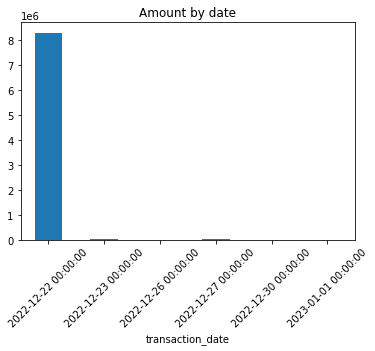

In [248]:
# Построим график распределения суммы по дням

agg_by_day.plot(kind='bar', x='transaction_date', y='amount', rot=45)
plt.title('Amount by date')
plt.show()

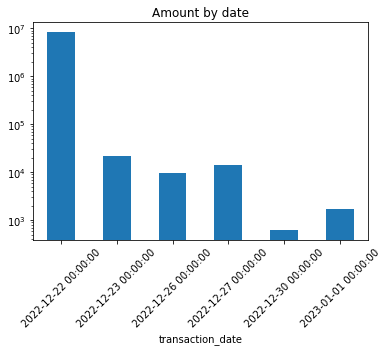

In [249]:
# Прологарифмируем ось У, чтобы лучше видеть различия между малыми и большими значениями

agg_by_day.plot(kind='bar', x='transaction_date', y='amount', rot=45, logy=True)
plt.title('Amount by date')
plt.show()

#### Сумма за 22.12.22 выбивается из общей картины. Также продажи товара TEST000003 кратно превышают продажи по остальным товарам. Сделаем запрос, чтобы посмотреть что это за товар. 

In [250]:
# Сделаем запрос, чтобы получить информацию по товару TEST00000

client_sku = LazopClient(url, appkey ,appSecret)
request_sku = LazopRequest('/product/item/get','GET')
request_sku.add_api_param('seller_sku', 'TEST000003')
response_sku = client.execute(request_sku, access_token)
print(response_sku.type)
print(response_sku.body)

ISP
{'code': '207', 'type': 'ISP', 'message': 'E207: SKU not exist', 'request_id': '2140c66e16740169731027847'}


#### Данный товар не существует. Возможно из-за того, что мой аккаунт тестовый и предназначен для отладки взаимодействия, то после определенного количества запросов система заливает тестовыми данными. 

## Выводы

#### 1. Подключились к API Lazada - крупнейшему маркетплейсу Юго-Восточной Азии и получили финансовые данные по транзакциям. Данные пришли чистые: без пропусков и выбросов
#### 2. Обнаружили, что если у одного и того же товара (один SKU) различное описание в колонке details, то такие товары будут проходить под разными транзакциями. И тут нужно посмотреть: есть ли возможность сделать для этих товаров одинаковое описание в details, если товары действительно ничем не отличаются. Если отличаются - сделать разные SKU
#### 3. Средняя комиссия за оплату наличными при доставке составила 1,69%, а при оплате кредитной картой - 2,73%
#### 4. Вычислили процент НДС и выдвинули предположение о том, что в различных категориях товаров величина НДС различается
#### 5. Обнаружили, что в ответе на запрос пришли тестовые данные. Вероятно, чтобы получать реальные данные нужно регистрировать какой-то партнерский аккаунт


### Больше примеров моей работы с данными можно посмотреть по ссылке https://github.com/VadimBaev/uplift. Здесь я обрабатываю пропуски в данных, выбросы, создаю новые фичи на основе старых и строю модель предсказания аплифта в розничной сети